#### 15.6.3 變數的相關性

隨機變數$X$和$Y$之共變異數（Covariance）可以衡量二者間的關係，描述的是兩隨機變數與各自期望之偏差的共同變動狀況，可表達為：

$$\text{Cov}(X,Y)=E[(X-E(X))(Y-E(Y))]$$

共變異數為正說明，平均而言變數$X$、$Y$與各自期望之偏差呈同方向變動；若為負，則為反方向變動。共變異數有以下的性質，讀者可自行驗證：

1. $\text{Cov}(X,Y)=\text{Cov}(Y,X)$
2. $\text{Cov}(aX,bY)=ab\text{Cov}(Y,X)$（$a$，$b$是常數）；
3. $\text{Cov}(X_1+X_2,Y)=\text{Cov}(X_1,Y)+\text{Cov}(X_2,Y)$

性質 2 說明共變異數的值受變異數比例影響，並不能準確衡量兩變數相關性之大小。舉個簡單的例子，假設變數$X$和$Y$的共變異數為10，且$X$的單位為米。若令$Z=100X$（單位為釐米），根據性質 2，$Z$和$Y$的共變異數為 1000，擴大了100倍。但是$X$和$Z$衡量的是同一個事物，$X$、$Y$之相關性與$Z$、$Y$之相關性是一樣的。

共變異數受比例影響，並不能直接衡量兩變數間相關性之強弱。因此，我們需要對共變異數做進一步處理，以消除比例的影響，由此引入相關係數（Correlation Coefficient）的概念。變數$X$和$Y$的相關係數定義為：

$$\rho_{X,Y}=\frac{\text{Cov}(X,Y)}{\sigma_X\sigma_Y}$$

相關係數的取值範圍為$[-1,+1]$。根據相關係數之定義，可以計算變數$aX$和$bY$的相關係數：

\begin{equation}
\begin{split}
\rho_{aX,bY} &= \frac{\text{Cov}(aX,bY)}{\sqrt{\text{Var}(aX)}\sqrt{\text{Var}(bY)}}\\
&=\frac{ab\text{Cov}(X,Y)}{|a|\sigma_X|b|\sigma_Y}\\
&=\pm\rho_{X,Y}
\end{split}
\end{equation}

可見，變數比例變動僅會影響相關係數的正負符號，並不會影響其絕對值的大小。現在我們考慮一個特殊的例子，變數$Y$是變數$X$的線性變換，滿足$Y=a+bX$，則二者之間的相關係數為：

\begin{equation}
\begin{split}
\rho_{aX,bY} &= \frac{\text{Cov}(X,a+bX)}{\sigma_X\sqrt{\text{Var}(a+bX)}}\\
&=\frac{b\text{Var}X}{|b|\text{Var}(X)}\\
&=\pm1
\end{split}
\end{equation}

也就是說$\rho_{X,Y}=\pm1$刻畫的是$Y$和$X$之間的線性關係，再具體地說，相關係數衡量的是隨機變數之間線性關係的大小，$|\rho|$越大說明線性關係越強；$\rho=0$說明兩個變數是不相關（Uncorrelated）的、無線性關係，但這並不說明兩變數相互獨立，二者可能存在非線性的關係；$0<\rho<1$時，兩變數呈現正向的線性關係；$-1<\rho<0$時，兩變數呈現負向的線性關係。

#### 15.6.4 台灣加權股價指數與台灣 50 指數的相關性分析

台灣加權股價指數（簡稱台灣加權指數、TAIEX），其樣本股包括所有掛牌交易中的普通股，是以上市股票之市值為權數計算出來的加權綜合股價指數，該指數反映了台灣的經濟走向。而台灣 50 指數的計算方式類似，樣本股是台灣證券市場中市值前五十大之上市公司。由於台灣加權股價指數利用市值進行加權，市值大的股票對指數的影響較大。所以，我們認為台灣加權股價指數和台灣 50 指數的日度收益率可能存在著相關關係。接下來我們用 Python 撰寫程式碼來探究二者的相關性。

In [18]:
# 讀取數據
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Sarasa Mono TC']

TRD_Index=pd.read_table('.\金融科技實戰_Python與量化投資\PythonBook_code_data\part2\index.csv',sep='\t')
TRD_Index.head()

,CO_ID,CoName,Date,ROI
0,Y9999,TSE Taiex,2014/01/02,0.0120
1,TWN50,TW 50 INDEX,2014/01/02,-0.3534
2,TM100,TW MID-CAP INDEX,2014/01/02,0.6243
3,Y9999,TSE Taiex,2014/01/03,-0.7663
4,TWN50,TW 50 INDEX,2014/01/03,-1.1200


In [19]:
np.unique(TRD_Index.CoName)

array(['TSE Taiex    ', 'TW 50 INDEX  ', 'TW MID-CAP INDEX',
       'TWSE CG100 TR Index', 'Taiwan HC 100'], dtype=object)

In [20]:
TRD_Index.index = pd.to_datetime(TRD_Index.Date)

In [21]:
# 獲取台灣加權股價指數收益率數據
Taiex=TRD_Index[TRD_Index.CoName=='TSE Taiex    ']
Taiex.head(3)

,CO_ID,CoName,Date,ROI
Date,,,,
2014-01-02,Y9999,TSE Taiex,2014/01/02,0.0120
2014-01-03,Y9999,TSE Taiex,2014/01/03,-0.7663
2014-01-06,Y9999,TSE Taiex,2014/01/06,-0.5444


In [22]:
# 獲取台灣加權股價指數收益率數據
tw50=TRD_Index[TRD_Index.CoName=='TW 50 INDEX  ']
tw50.head(3)

,CO_ID,CoName,Date,ROI
Date,,,,
2014-01-02,TWN50,TW 50 INDEX,2014/01/02,-0.3534
2014-01-03,TWN50,TW 50 INDEX,2014/01/03,-1.1200
2014-01-06,TWN50,TW 50 INDEX,2014/01/06,-0.5494


In [23]:
# 合併兩者的日度收益率數據
retData = pd.concat([Taiex.ROI,tw50.ROI],axis=1).astype(np.float)
retData =retData.dropna()
retData.columns=['TAIEX','TW50']
retData.head()

,TAIEX,TW50
Date,,
2014-01-02,0.0120,-0.3534
2014-01-03,-0.7663,-1.1200
2014-01-06,-0.5444,-0.5494
2014-01-07,0.1446,-0.2469
2014-01-08,0.5135,0.5209


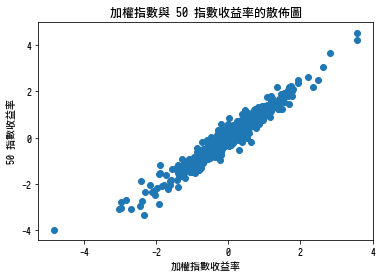

0.9709016200567359

In [24]:
# 繪製加權指數與 50 指數收益率的散佈圖
plt.scatter(retData.TAIEX,retData.TW50)
plt.title('加權指數與 50 指數收益率的散佈圖')
plt.xlabel('加權指數收益率')
plt.ylabel('50 指數收益率')
plt.show()

# 計算加權指數與 50 指數收益率的相關係數
retData.TAIEX.corr(retData.TW50)

觀察加權指數與 50 指數收益率散佈圖，如圖 15.6 所示，兩個收益率序列的散佈圖呈現出從左下向右上方向擴散的趨勢，表明兩個收益率序列之間存在著正相關性。進一步分析兩個收益率序列的相關係數，用 corr() 函數求出兩個收益率序列的相關係數為 0.97090162005673597，可以認為，兩個收益率序列之間存在較強的相關性，二者呈現正向的線性關係。